# Exercise 4.9: Intro to Data Visualization with Python

#### Imporing libraries and datasets

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Creating 'path' shortcut
path = r'C:\Users\Longus\Documents\26-02-2023 Instacart Basket Analysis'

In [4]:
#Importing 'orders_products_merged_aggregated.pkl'
df_ords_prods_merged = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_merged_aggregated.pkl'))

### Creating Bar Charts

<AxesSubplot:>

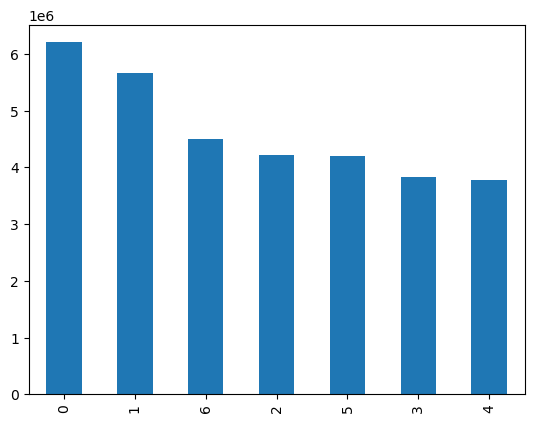

In [5]:
#Creating a bar chart for counts of values of 'orders_day_of_week'
df_ords_prods_merged['order_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

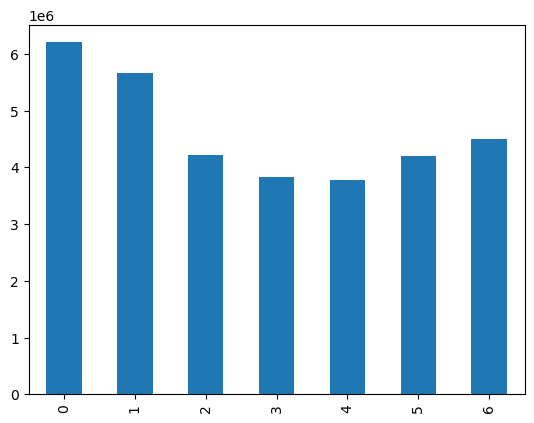

In [6]:
#The sort_index() function will sort the bars in your chart according to their index order
df_ords_prods_merged['order_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
df_ords_prods_merged['order_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: order_day_of_week, dtype: int64

In [8]:
df_ords_prods_merged['order_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: order_day_of_week, dtype: int64

<AxesSubplot:>

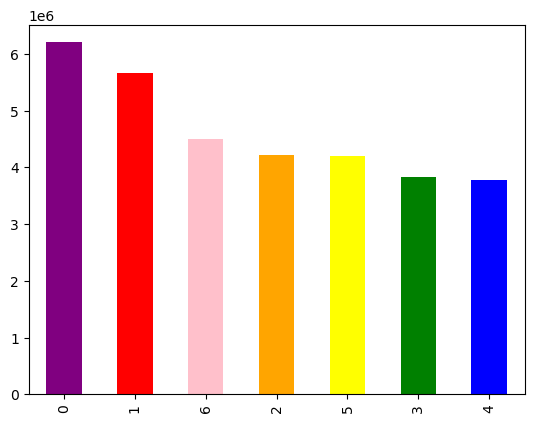

In [9]:
#We can also add colours to the bar chart
df_ords_prods_merged['order_day_of_week'].value_counts().plot.bar(color = ['purple','red','pink','orange','yellow','green','blue'])

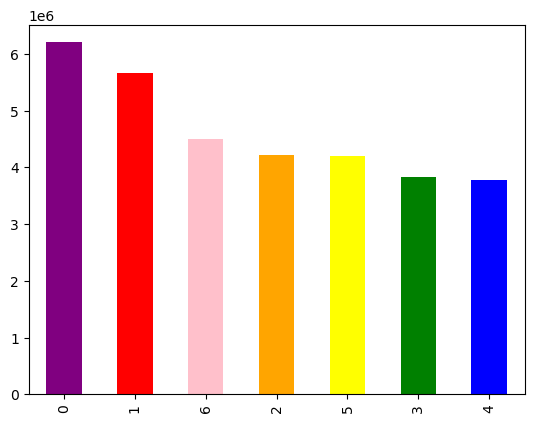

In [10]:
#Saving the visualization in the Jupiter Notebook
bar = df_ords_prods_merged['order_day_of_week'].value_counts().plot.bar(color = ['purple','red','pink','orange','yellow','green','blue'])

In [11]:
#Exporting the bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### Creating Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

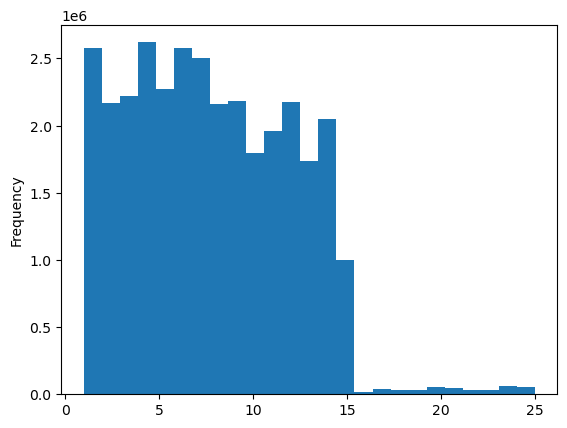

In [12]:
#Creating a histogram for the 'prices' column
df_ords_prods_merged['prices'].plot.hist(bins = 25)

In [13]:
df_ords_prods_merged['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

##### The max value is too high making the histogram look like it has only one bar

<AxesSubplot:xlabel='prices', ylabel='prices'>

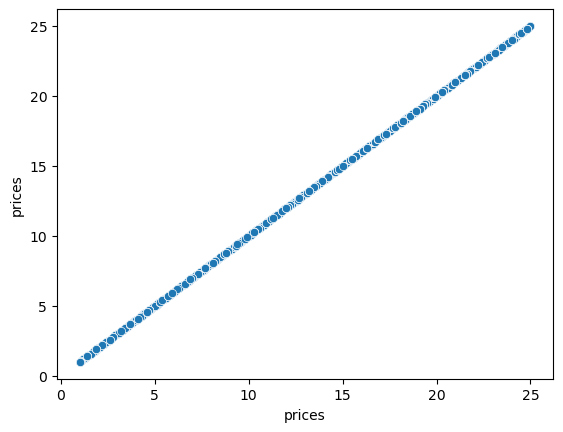

In [14]:
#When conducting an exploratory analysis, you can also use scatterplots to visualize the distribution of data points in order to identify any outliers
sns.scatterplot(x = 'prices', y = 'prices', data = df_ords_prods_merged)

#### There seem to be two outlier values in the 'prices' column

In [15]:
df_ords_prods_merged.drop(['Unnamed: 0.1','Unnamed: 0_x'], axis = 1, inplace = True)

In [16]:
#Checking if there are any items costing more than $100
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] > 100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_freq,order_freq_flag


In [17]:
#Turning the outlier prices into missing values(NaN)
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] >100, 'prices'] = np.nan

In [18]:
#Checking if the replacement was successful
df_ords_prods_merged['prices'].max()

25.0

#### Maximum value is now 25 which is more realistic

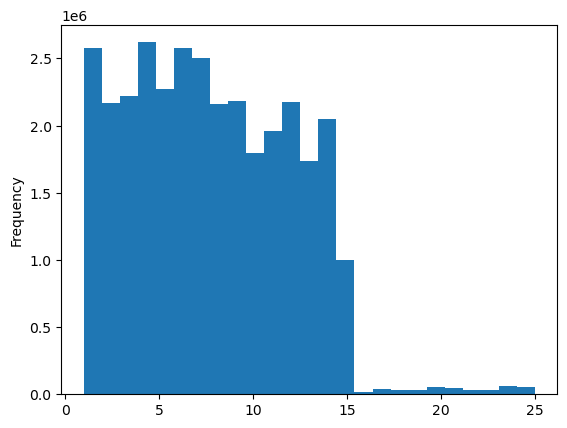

In [19]:
#Second try with histogram
hist = df_ords_prods_merged['prices'].plot.hist(bins = 25)

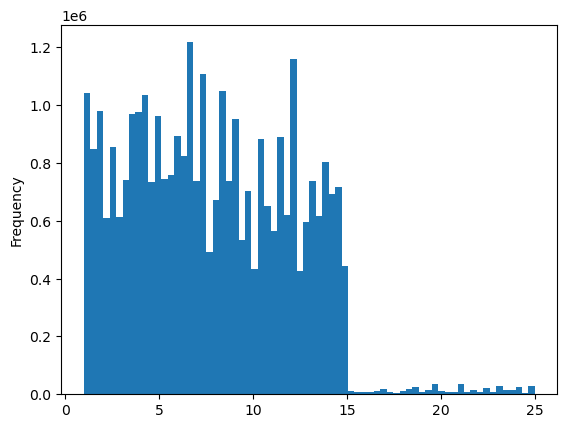

In [20]:
#Increasing the level of granularity bz increasing number of bins to 70
hist_2 = df_ords_prods_merged['prices'].plot.hist(bins = 70)

In [21]:
#Exporting the histograms
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

In [22]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_2_orders_dow.png'))

### Creating Line Charts

##### Creating line charts requires lot of computing power. We could use subset but that would not be a real representation of the entire population.
##### What we can do is data sampling!

### Data Sampling

In [23]:
#Creating a 70/30 ration data sample. Assigning random value to every row in 'df_ords_prods_merged'
np.random.seed(4)
#Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
#Store the results of the test in a new list, dev, in the form of boolean values (True and False).
dev = np.random.rand(len(df_ords_prods_merged)) <= 0.7

In [24]:
#Store 70 percent (True values) in big dataframe
big = df_ords_prods_merged[dev]

In [25]:
#Store 30 percent (False values) in small dataframe
small = df_ords_prods_merged[~dev]

In [26]:
#Checking if  we have correct number of rows
len(df_ords_prods_merged)

32404859

In [27]:
len(big) + len(small)

32404859

In [28]:
#Reducing the sample only to columns that are necessary for the chart, 'prices' and 'order_day_of_week'
df_2 = small[['order_day_of_week','prices']]

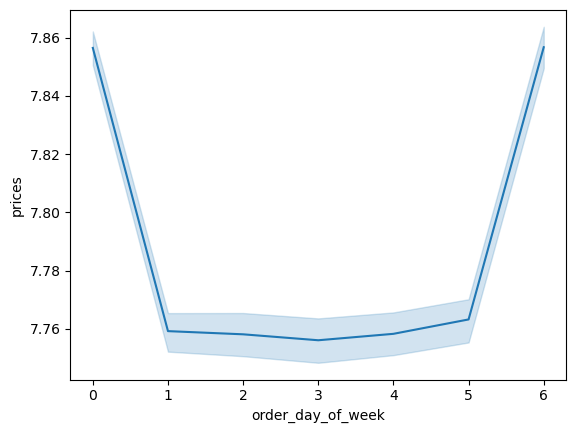

In [29]:
#Creating the Line chart
line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')